# Tarea 1

Nombre: Mario Calderón

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

import camb
from scipy.constants import G
from scipy.constants import c

# Pregunta 6

Using CAMB, plot the evolution of the density parameters for matter, radiation, dark energy and curvature

In [ ]:
#Definimos la cosmología
H0 = 67.4
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

pars.set_dark_energy(w=-1.0)

results = camb.get_results(pars)
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.0224
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24586829360147697
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

In [ ]:
#Densidad critica
rho_cr = (3*H0**2)/(8*np.pi*G)

#parámetro a 
z = np.linspace(0.0, 10, 1_000)
a = 1.0 / (1.0 + z)

#Parámetros de densidad 
Omega_m = results.get_Omega('baryon', z) + results.get_Omega('cdm', z) + results.get_Omega('nu', z)
Omega_r = results.get_Omega('photon', z) +  results.get_Omega('neutrino', z)
Omega_de =  results.get_Omega('de', z)
Omega_k =  1 - Omega_m - Omega_r - Omega_de

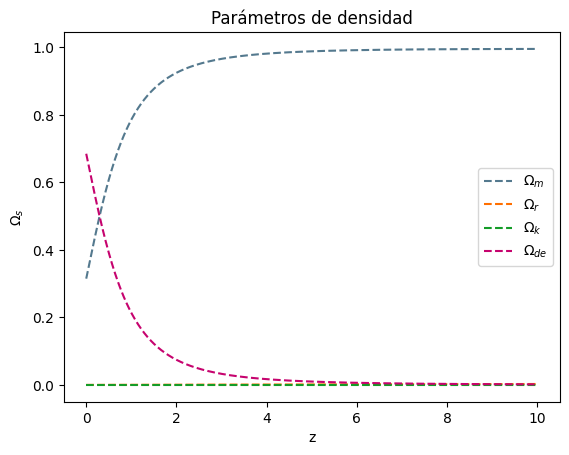

In [ ]:
#Gráfico
plt.figure()
plt.plot(z, Omega_m, color="#54798E", label=r'$\Omega_m$', linestyle='dashed')  # azul
plt.plot(z, Omega_r, color="#FF6F00", label=r'$\Omega_r$', linestyle='dashed')  # naranja
plt.plot(z, Omega_k, color="#139C27", label=r'$\Omega_k$', linestyle='dashed')  # verde
plt.plot(z, Omega_de, color="#C6036E", label=r'$\Omega_{de}$', linestyle='dashed')  # magenta
plt.title('Parámetros de densidad')
plt.xlabel('z')
plt.ylabel(r'$\Omega_s$')
plt.legend()
plt.show()

In [ ]:
#Vemos para otras escalas de redshifts
Z = np.linspace(0,5_000,1_000)
Omega_m = results.get_Omega('cdm', Z) + results.get_Omega('baryon', Z) + results.get_Omega('nu', Z)
Omega_r = results.get_Omega('photon', Z) +  results.get_Omega('neutrino', Z)
Omega_de =  results.get_Omega('de', Z)
Omega_k =  1 - Omega_m - Omega_r - Omega_de


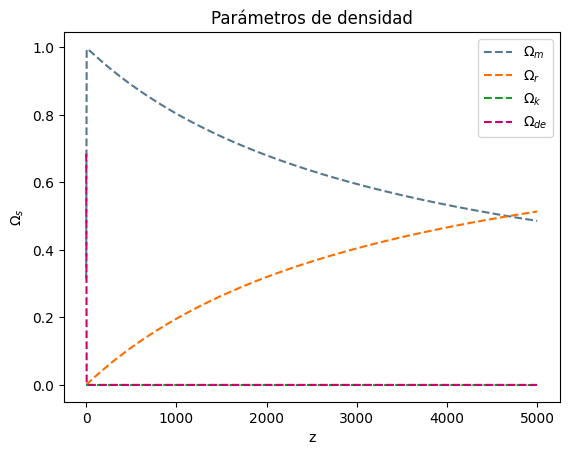

In [53]:
#Gŕafico
plt.figure()
plt.plot(Z, Omega_m, color="#54798E", label=r'$\Omega_m$', linestyle='dashed')  # azul
plt.plot(Z, Omega_r, color="#FF6F00", label=r'$\Omega_r$', linestyle='dashed')  # naranja
plt.plot(Z, Omega_k, color="#139C27", label=r'$\Omega_k$', linestyle='dashed')  # verde
plt.plot(Z, Omega_de, color="#C6036E", label=r'$\Omega_{de}$', linestyle='dashed')  # magenta
plt.title('Parámetros de densidad')
plt.xlabel('z')
plt.ylabel(r'$\Omega_s$')
plt.legend()
plt.show()

# Pregunta 7

The distance duality relation gives

$$
D_L(z) = (1+z)^2 D_A(z), \qquad 
$$

where $D_L(z)$ and $D_A(z)$ are the luminosity distance and angular diameter distance, respectively, as a function of the redshift $z$.

Using **Python**, plot the lines of constant $f_K(\chi)$ in the plane $\Omega_{m,0}-\Omega_{\Lambda,0}$, where

$$
f_K(\chi)=
\begin{cases}
\dfrac{c}{H_0\sqrt{\Omega_{K,0}}}\;
\sinh\!\left(\sqrt{\Omega_{K,0}}\displaystyle\int_{0}^{z}\frac{dx}{E(x)}\right), & \Omega_{k,0}>0,\\[1.25em]
\dfrac{c}{H_0}\displaystyle\int_{0}^{z}\frac{dx}{E(x)}, & \Omega_{k,0}=0,\\[1.25em]
\dfrac{c}{H_0\sqrt{-\Omega_{K,0}}}\;
\sin\!\left(\sqrt{-\Omega_{K,0}}\displaystyle\int_{0}^{z}\frac{dx}{E(x)}\right), & \Omega_{k,0}<0,
\end{cases}
\qquad 
$$

and $E(x)$ is the dimensionless Hubble parameter.


In [ ]:
z = np.linspace(0, 10, 1_000)
Omega_r0 = 8.24 * 10 ** (-5) #valor hoy
zl = 1_000

In [ ]:
def Hubble(z, omegam0, omegal0):
    z  = np.asarray(z)
    om = np.asarray(omegam0)
    ol = np.asarray(omegal0)

    # Construye grillas 
    Z, OM, OL = np.broadcast_arrays(z[:, None, None], om[None, :, None], ol[None, None, :])

    # Omega_k0 = 1 - O_m0 - O_L0 - O_r0
    OK = 1.0 - OM - OL - Omega_r0

    a1 = (1.0 + Z)
    H = H0 * np.sqrt(Omega_r0 * a1**4 + OM * a1**3 + OL + OK * a1**2)
    return H

In [ ]:
#Definimos la función f_k
def f_k(z, omegam0, omegal0, *, atol_k=1e-14):

    z = np.asarray(z)
    om = np.asarray(omegam0)
    ol = np.asarray(omegal0)

    # E = H/H0 
    E = Hubble(z, om, ol) / H0

    # chi(O) = int(dz / E)
    chi = integrate.trapezoid(1.0 / E, z, axis=0)  

    # O_k0 = 1 - O_m0 - O_L0 - O_r0  
    Omega_k0 = 1.0 - om[:, None] - ol[None, :] - Omega_r0

    # Máscara para los tres casos
    pos = Omega_k0 >  atol_k
    neg = Omega_k0 < -atol_k
    zer = ~(pos | neg)  

    fk = np.empty_like(chi, dtype=float)

    # k > 0  ->  sinh(sqrt(k) x)/sqrt(k)
    sqrt_k_pos = np.sqrt(Omega_k0, where=pos, out=np.zeros_like(Omega_k0))
    fk[pos] = np.sinh(sqrt_k_pos[pos] * chi[pos]) / sqrt_k_pos[pos]

    # k = 0  ->  x
    fk[zer] = chi[zer]

    # k < 0  ->  sin(sqrt(-k) x)/sqrt(-k)
    sqrt_k_neg = np.sqrt(-Omega_k0, where=neg, out=np.zeros_like(Omega_k0))
    fk[neg] = np.sin(sqrt_k_neg[neg] * chi[neg]) / sqrt_k_neg[neg]

    # c/H0
    fk *= (c / H0)
    return fk


In [ ]:
# omegal0 y omegam0
x = np.linspace(-1, 3, 100)
y = np.linspace(-1, 3, 100)

fk1 = f_k(z, x, y)

z = np.linspace(0, 20, 1000)
fk2 = f_k(z, x, y)

z = np.linspace(0, 1, 1000)
fk3 = f_k(z, x, y)

/tmp/ipykernel_4466/3895126662.py:11: RuntimeWarning: invalid value encountered in sqrt
  H = H0 * np.sqrt(Omega_r0 * (1 + z[:, None, None])**4 +


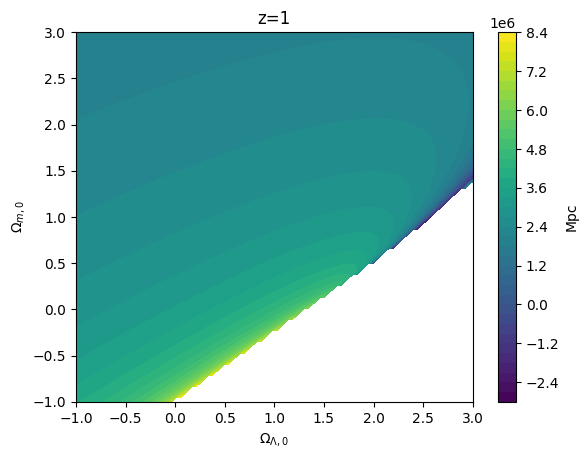

In [48]:
plt.contourf(x,y,fk3,levels=40)
plt.xlabel(r'$\Omega_{\Lambda,0}$')
plt.ylabel(r'$\Omega_{m,0}$')
plt.title('z=1')
plt.colorbar(label='Mpc')
plt.show()

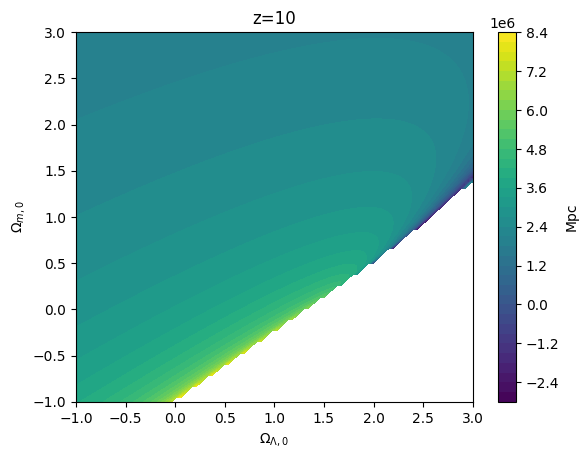

In [49]:
plt.contourf(x,y,fk1,levels=40)
plt.xlabel(r'$\Omega_{\Lambda,0}$')
plt.ylabel(r'$\Omega_{m,0}$')
plt.title('z=10')
plt.colorbar(label='Mpc')
plt.show()

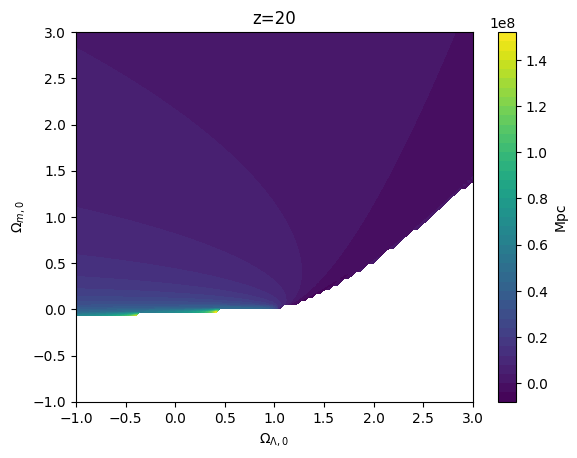

In [51]:
plt.contourf(x,y,fk2,levels=40)
plt.xlabel(r'$\Omega_{\Lambda,0}$')
plt.ylabel(r'$\Omega_{m,0}$')
plt.title('z=20')
plt.colorbar(label='Mpc')
plt.show()